<a href="https://colab.research.google.com/github/arnoldkiirya1/Makerere_university_AI_bootcamp/blob/main/SentimentAnalysisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Negative Review Detection Project

In creating a new and edgy community for classical movie enthusiasts, the Film Junky Union is hoping to develop a system for filtering and categorizing movie reviews. As part of the team, our job is to develop a model that automatically detects negative reviews. In building a model for classifying positive and negative reviews, we will be using a dataset containing IMDB movie reviews with polarity labelling. The measure of an adquate model will be one which has an F1 score of no less than .85.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries-and-Preprocess-the-Data" data-toc-modified-id="Import-Libraries-and-Preprocess-the-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries and Preprocess the Data</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Preprocess-Data" data-toc-modified-id="Preprocess-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Preprocess Data</a></span><ul class="toc-item"><li><span><a href="#Check-for-Missing-Values" data-toc-modified-id="Check-for-Missing-Values-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Check for Missing Values</a></span></li><li><span><a href="#Check-for-Duplicates" data-toc-modified-id="Check-for-Duplicates-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Check for Duplicates</a></span></li><li><span><a href="#Check-Datatypes" data-toc-modified-id="Check-Datatypes-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Check Datatypes</a></span></li><li><span><a href="#Remove-Unnecessary-Characters-from-Reviews" data-toc-modified-id="Remove-Unnecessary-Characters-from-Reviews-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Remove Unnecessary Characters from Reviews</a></span></li><li><span><a href="#Preprocessing-Conclusion" data-toc-modified-id="Preprocessing-Conclusion-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Preprocessing Conclusion</a></span></li></ul></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Checker-Number-of-Movies/Reviews-per-Year" data-toc-modified-id="Checker-Number-of-Movies/Reviews-per-Year-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Checker Number of Movies/Reviews per Year</a></span></li><li><span><a href="#Examine-Distribution-of-Total-Reviews-by-Movie" data-toc-modified-id="Examine-Distribution-of-Total-Reviews-by-Movie-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Examine Distribution of Total Reviews by Movie</a></span></li><li><span><a href="#Distribution-of-Ratings-and-Pos/Neg-Reviews" data-toc-modified-id="Distribution-of-Ratings-and-Pos/Neg-Reviews-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Distribution of Ratings and Pos/Neg Reviews</a></span></li><li><span><a href="#Exploratory-Data-Analysis-Conclusion" data-toc-modified-id="Exploratory-Data-Analysis-Conclusion-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Exploratory Data Analysis Conclusion</a></span></li></ul></li><li><span><a href="#Create-Evaluation-Procedure" data-toc-modified-id="Create-Evaluation-Procedure-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create Evaluation Procedure</a></span></li><li><span><a href="#Split-Data-into-Training-and-Testing-Sets" data-toc-modified-id="Split-Data-into-Training-and-Testing-Sets-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Split Data into Training and Testing Sets</a></span></li><li><span><a href="#Train-and-Test-Models" data-toc-modified-id="Train-and-Test-Models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train and Test Models</a></span><ul class="toc-item"><li><span><a href="#Model-1---Dummy-Model" data-toc-modified-id="Model-1---Dummy-Model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model 1 - Dummy Model</a></span></li><li><span><a href="#Model-2---NLTK,-TF-IDF,-LR" data-toc-modified-id="Model-2---NLTK,-TF-IDF,-LR-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Model 2 - NLTK, TF-IDF, LR</a></span></li><li><span><a href="#Model-3---spaCy,-TF-IDF,-LR" data-toc-modified-id="Model-3---spaCy,-TF-IDF,-LR-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Model 3 - spaCy, TF-IDF, LR</a></span></li><li><span><a href="#Model-4---spaCy,-TF-IDF,-LGBMClassifier" data-toc-modified-id="Model-4---spaCy,-TF-IDF,-LGBMClassifier-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Model 4 - spaCy, TF-IDF, LGBMClassifier</a></span></li><li><span><a href="#Model-5---BERT" data-toc-modified-id="Model-5---BERT-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Model 5 - BERT</a></span></li><li><span><a href="#Train-and-Test-Models-Conclusion" data-toc-modified-id="Train-and-Test-Models-Conclusion-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Train and Test Models Conclusion</a></span></li></ul></li><li><span><a href="#Test-Models-on-New-Reviews" data-toc-modified-id="Test-Models-on-New-Reviews-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Test Models on New Reviews</a></span><ul class="toc-item"><li><span><a href="#Create-'Fake'-Reviews" data-toc-modified-id="Create-'Fake'-Reviews-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Create 'Fake' Reviews</a></span></li><li><span><a href="#Model-2---NLTK,-TF-IDF,-LR" data-toc-modified-id="Model-2---NLTK,-TF-IDF,-LR-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Model 2 - NLTK, TF-IDF, LR</a></span></li><li><span><a href="#Model-3---spaCy,-TF-IDF,-LR" data-toc-modified-id="Model-3---spaCy,-TF-IDF,-LR-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Model 3 - spaCy, TF-IDF, LR</a></span></li><li><span><a href="#Model-4---spaCy,-TF-IDF,-LGBMClassifer" data-toc-modified-id="Model-4---spaCy,-TF-IDF,-LGBMClassifer-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Model 4 - spaCy, TF-IDF, LGBMClassifer</a></span></li><li><span><a href="#Model-5---BERT,-LR" data-toc-modified-id="Model-5---BERT,-LR-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Model 5 - BERT, LR</a></span></li><li><span><a href="#Fake-Review-Testing-Conclusion" data-toc-modified-id="Fake-Review-Testing-Conclusion-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Fake Review Testing Conclusion</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

## Import Libraries and Preprocess the Data

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier
from tqdm import tqdm, tqdm_notebook
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import math
import spacy
import torch
import transformers

import warnings
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

### Load Data

In [ ]:
try:
    df_reviews = pd.read_csv('\imdb_reviews.tsv', sep='\t')
except:
    df_reviews = pd.read_csv('https://code.s3.yandex.net/datasets/imdb_reviews.tsv', sep='\t')

In [ ]:
#Preview DataFrame sample.
display(df_reviews.head())

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218.0,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218.0,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184.0,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184.0,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184.0,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


1.2 Notes: It appears that the DataFrame we will be working with has 18 columns, with a mixture of categorical, discrete, and continuous variables. As we will be building a model to determine whether a review is positive or negative based on the content of the review itself, most of these features are irrelevant; as such, we do not need to concern ourselves with preprocessing anything other than the 'review' and 'pos' Series for our model.  

### Preprocess Data

#### Check for Missing Values

In [ ]:
#Calculate total rows with missing values in 'review' or 'pos' column.
print("Total NaNs in each column: ")
display(df_reviews.isnull().sum())

Total NaNs in each column: 


tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

1.3.1 Notes: Apparently there are only NaNs in the 'average_rating' and 'votes' column. Since we will not be using these columns in developing a sentiment analyzer for reviews, we will not attend to the NaNs.

#### Check for Duplicates

In [ ]:
#Print total number of duplicated rows.
print(f'Total duplicated rows: {df_reviews.duplicated().sum()}')

Total duplicated rows: 0


#### Check Datatypes

In [ ]:
print(df_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  float64
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: float64(2

1.3.3 Notes: The datatype of the 'review' and 'pos' columns are object and int64, respectively; as such, they are properly formatted for the purposes of training and testing machine learning models.

#### Remove Unnecessary Characters from Reviews

In [ ]:
#Create function to remove all but letters and apostrophes from 'review' column.
def reduce_char(df):
    """
    Function removes all but letters and apostrophes from texts.
    """
    reduced = re.sub(r"[^a-zA-Z']", " ", df).split()
    reduced = " ".join(reduced).lower()
    return reduced

#Apply function to every review in the DataFrame
df_reviews['rev_norm'] = df_reviews['review'].apply(reduce_char)

1.3.4 Notes: In order for the models we will be training to perform as efficiently as possible and base predictions on the words/phrases/terms used, we removed all characters from each review that is not a letter or apostrophe. We also made all text lowercase.

#### Preprocessing Conclusion

While there are many columns in our DataFrame, we need not be concerned with most of them as our goal is to build a model that predicts whether a review is positive or negative purely based on the content of the review. We did not find that there were any duplicated or missing review/pos values. Both columns are properly formatted for our purposes, and all characters that are not letters or apostrophes have been removed from the text.

In the next section, we will perform exploratory data analysis on our data.

## Exploratory Data Analysis

### Checker Number of Movies/Reviews per Year

To get a better feel for our data, we will begin by examining the total number of movies released and reviews created each year.

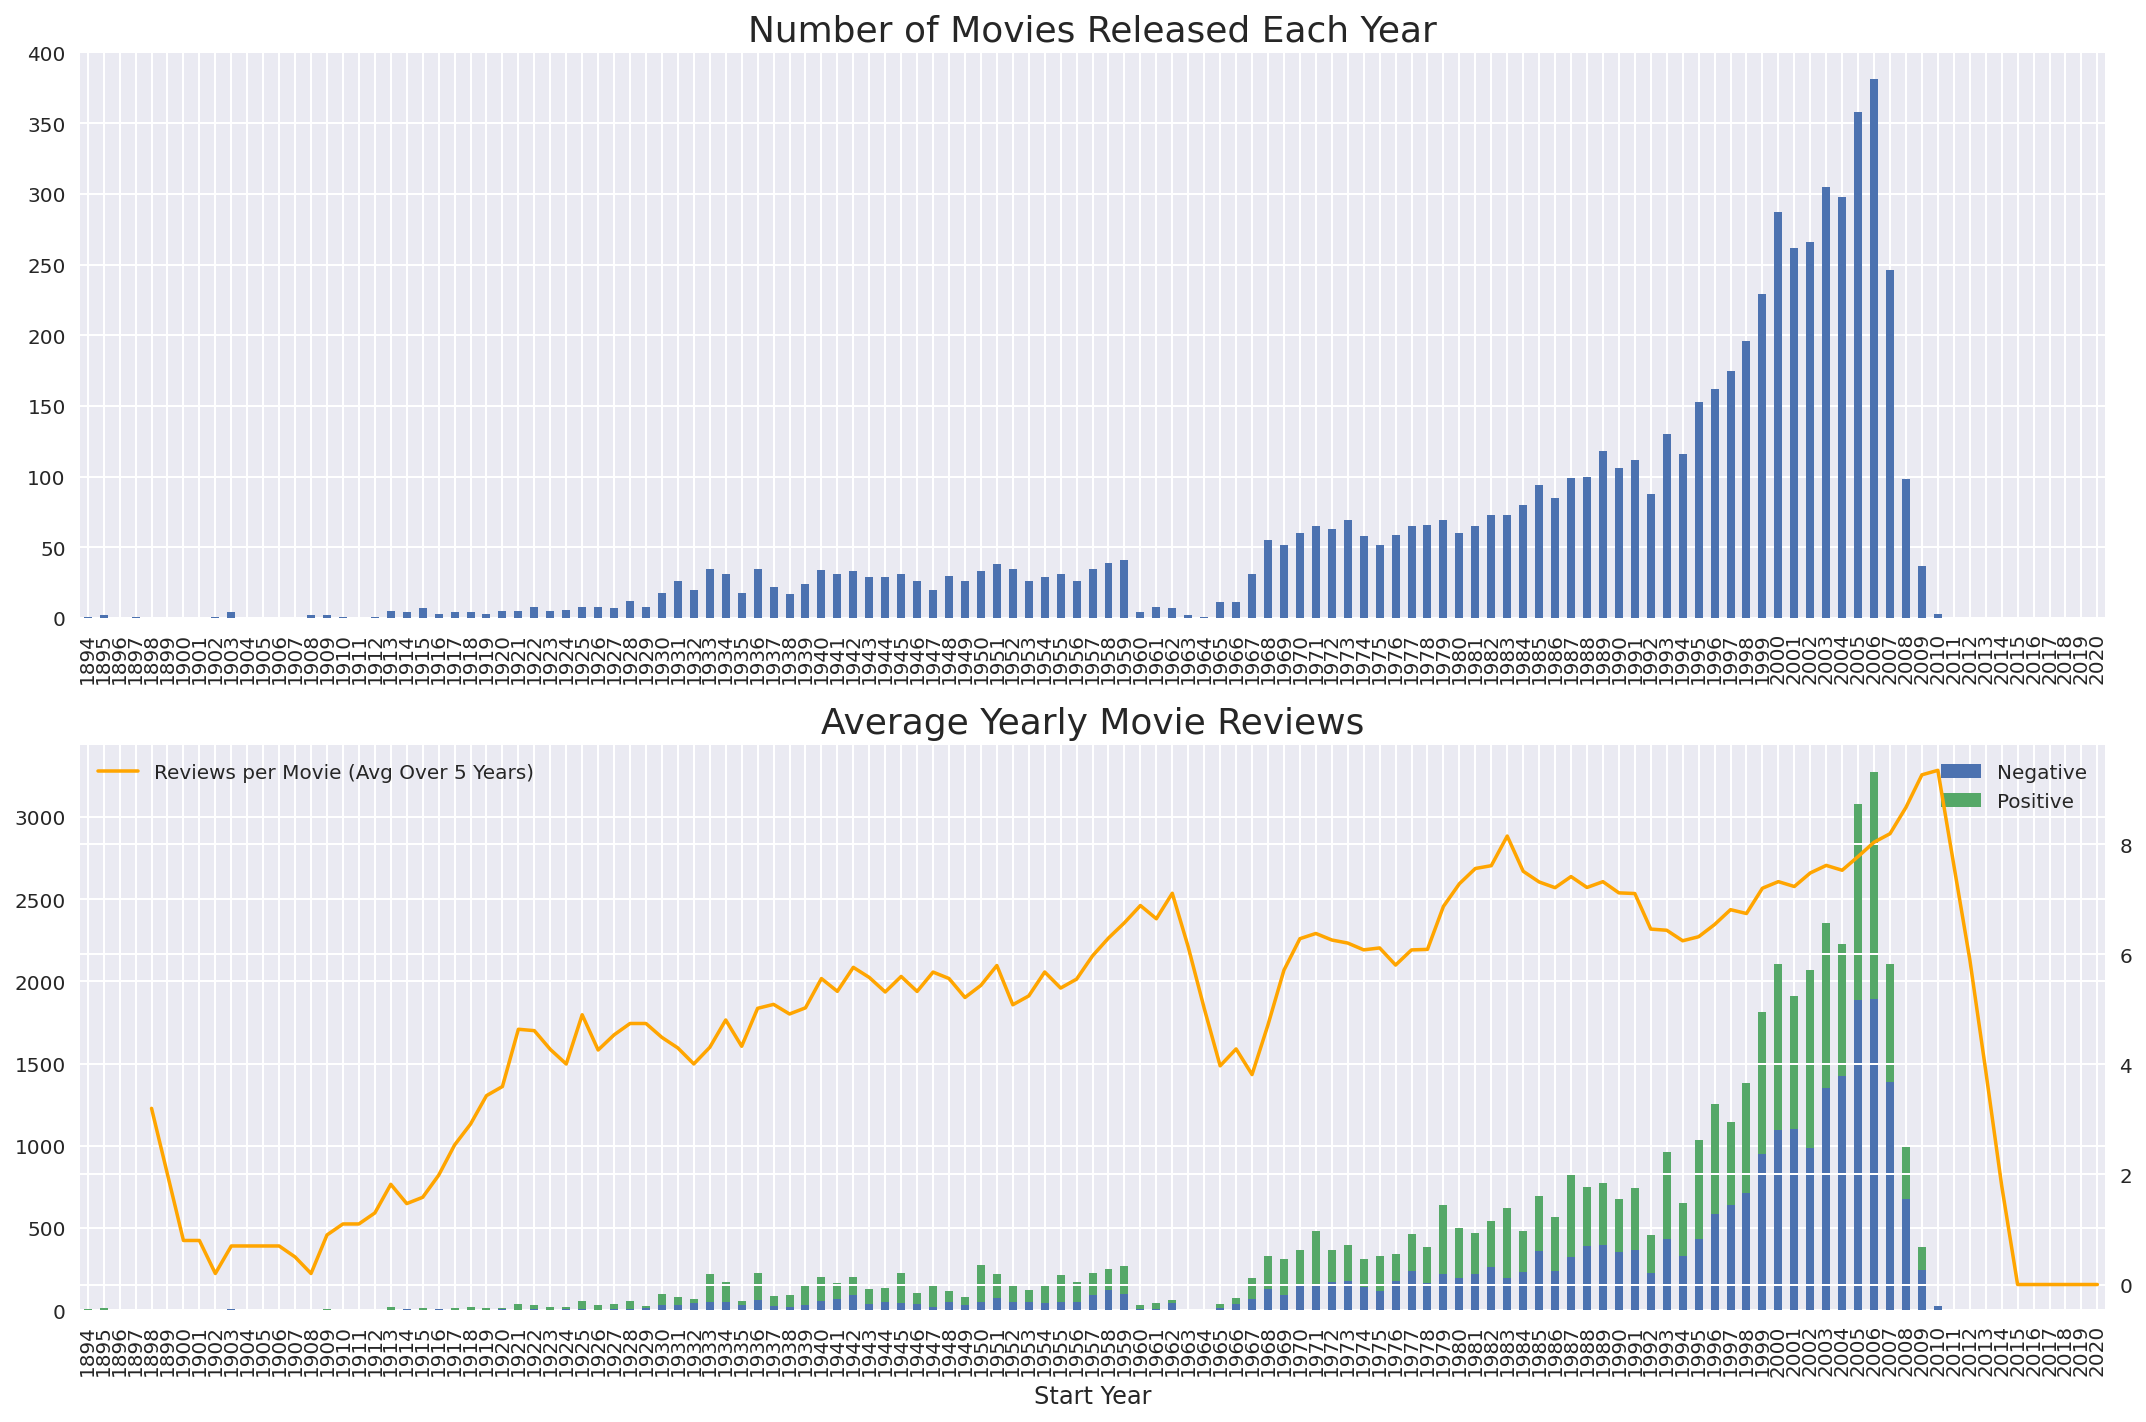

In [ ]:
#Create figure with subplots.
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

#Set first axis.
ax = axs[0]

#Create plot showing number of movies released each year.
dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Released Each Year', fontsize=18)

#Set second axis.
ax = axs[1]

#Create plot showing number of movies reviews over the years.
dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft2.plot(kind='bar', stacked=True, label=['neg', 'pos'], ax=ax)
axs[1].legend(labels=['Negative', 'Positive'], loc=0)

#Create rolling average (5 years) line for yearly total reviews.
dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='Reviews per Movie (Avg Over 5 Years)', ax=axt)
axt.legend(loc=0)
ax.set_title('Average Yearly Movie Reviews', fontsize=18)
ax.set_xlabel('Start Year', fontsize=12)
fig.tight_layout()

2.1 Notes: The above graphs allow us to visualize the number of movies released and reviews made each year. The first plot shows the total movies released per year, while the second plot shows the average yearly movie reviews, with positive reviews in green and negative in blue; additionally, the second plot shows a rolling average of review per movie within a 5 year window. 

As we see, the information in our DataFrame suggests that 2006 was the year with the most movies released. This alings with the year with the most movie reviews made. The number of movies released sharply declined after 2006, which roughly coincides with the financial crisis of 2008; the total number of reviews made followed the same trend.

In the next subsection, we will examine the distribution of reviews per movie.

### Examine Distribution of Total Reviews by Movie

In this subsection we will plot the distribution of movie reviews. We will do so by first grouping the movies and counting the number of reviews for each; we will plot the number of reviews a movie may have on the x-axis and the total number of movies with that number of reviews on the y-axis. Next we will count the total number of reviews for each movie and plot the frequency of the movies with each number of reviews using a KDE plot.

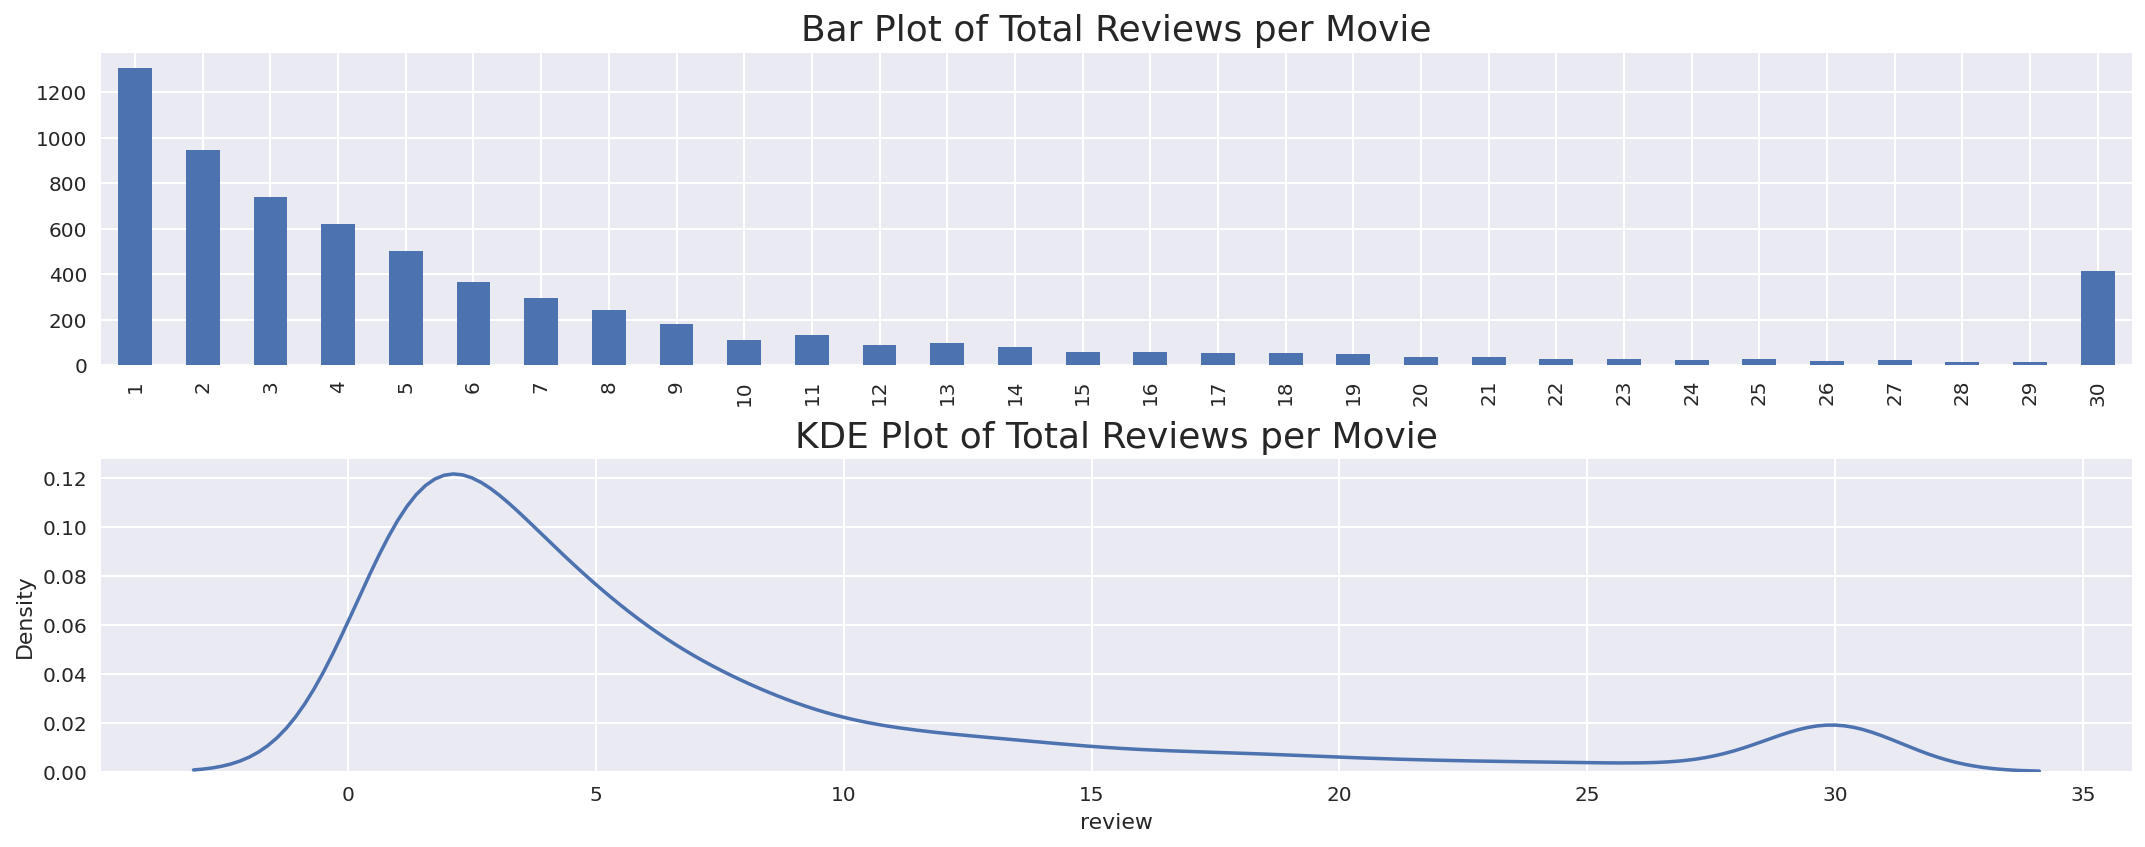

In [ ]:
#Create figure with subplots.
fig, axs = plt.subplots(2, 1, figsize=(15, 6))

#Set first axis.
ax = axs[0]

#Group movies by title label and count total number of reviews. Plot output.
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of Total Reviews per Movie', fontsize=18)

#Set second axis.
ax = axs[1]

#Create KDE plot to show frequency of total movie reviews.
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of Total Reviews per Movie', fontsize=18)
fig.tight_layout()

#Increase space between subplots.
fig.subplots_adjust(hspace=.3)
plt.show()

2.2 Notes: From these graphs we can see that the majority of movies have a low number of reviews (e.g., less than 10). Most movies fall into the bin of 1 for the total number of reviews, and the total number of movies tends to decrease with an increase number of reviews. The exception to this is movies with 30 reviews; these movies are presumably some of the most popular represented in the DataFrame. To test this theory, let us use boxplots to visualize the range of ratings of movies grouped by the number of reviews they have.

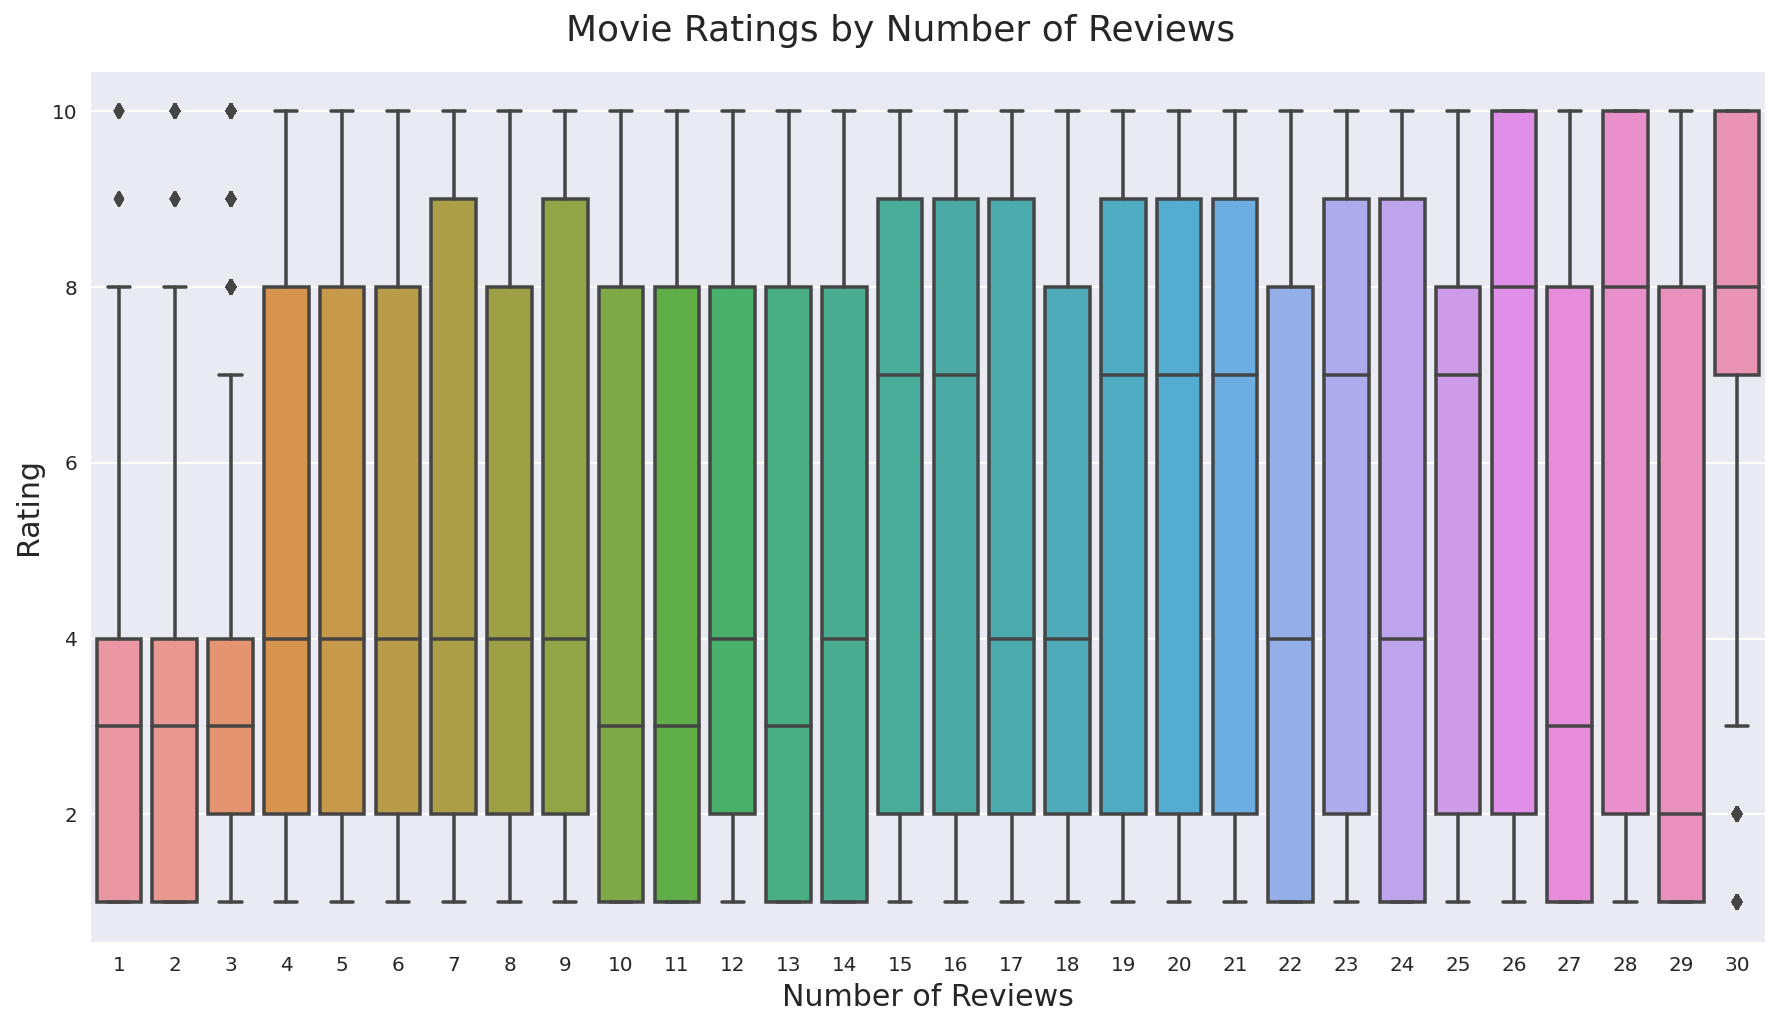

In [ ]:
#Create new column with total reviews for each movie.
df_reviews['num_rev'] = df_reviews.groupby('tconst')['review'].transform('count')

#Create boxplot to display range and average of movie ratings by number of movie reviews.
fig = plt.figure(figsize=(15, 8))
sns.boxplot(x="num_rev", y="rating", data=df_reviews[['num_rev', 'rating']])
fig.suptitle('Movie Ratings by Number of Reviews', fontsize=18, y=.93)
plt.xlabel('Number of Reviews', fontsize=15)
plt.ylabel('Rating', fontsize=15)
plt.show()

2.2 Notes Continued: From this boxplot, we can can see somewhat of a theme among movies with a high number of reviews - that is, the movies appear to have a higher mean rating than movies with a much lower number of reviews or a lower rating. The mean rating for movies with between 1-14 reviews appears to be between 3 and 4. These ragints appear to fluctuate between a higher range for movies with between 15 and 25 reviews. For movies with between 25 and 29 reviews, there is an even greater mean rating rance - between around 2 and 8. Finally, for movies with 30 reviews, they have a mean rating of 8. Interestingly, the interquartile range of ratings for movies with between 1 and 3 reviews is lowest, while the interquartile range of ratings for movies with 30 reviews is the highest. With all this considered, it appears that our assumption has merrit - that is, movies with 30 reviews tend to have the highest ratings, which might indicate that they are highly popular.

In the following subsection, we will look at the distribution of positive and negative reviews in the dataset, as well as the distribution of ratings for movies in the training and testing datasets.

### Distribution of Ratings and Pos/Neg Reviews

In [ ]:
#Print the number of positive and negative reviews in the dataset.
print("Total positive and negative reviews in the dataset: ")
display(df_reviews['pos'].value_counts().reset_index(drop=True))

print('\nTotal positive and negative reviews for training dataset: ')
display(df_reviews.query('ds_part == "train"')['pos'].value_counts().reset_index(drop=True))

print('\nTotal positive and negative reviews for testing dataset: ')
display(df_reviews.query('ds_part == "test"')['pos'].value_counts().reset_index(drop=True))


Total positive and negative reviews in the dataset: 


0    23715
1    23616
Name: pos, dtype: int64


Total positive and negative reviews for training dataset: 


0    11912
1    11884
Name: pos, dtype: int64


Total positive and negative reviews for testing dataset: 


0    11803
1    11732
Name: pos, dtype: int64

2.3 Notes: As we can see here, there are roughly an equal number of positive and negative reviews in our dataset. This is good, as we will not have to balance the datasets by up/downsampling or SMOTEing. We found that there is a similar distribution of positive and negative reviews for both the training and testing datasets. Some of these review labels, however, might be based on a rating that could be taken by some as ambiguous; for example, a rating of 5 might be taken as good by some and bad by others. To see if this is the case in our dataset, let us visualize the distribution of ratings for both the training and testing datasets. Note that while we have not yet split our dataset into testing and training sets, the column 'ds_part' indicates which set the observation belongs to.

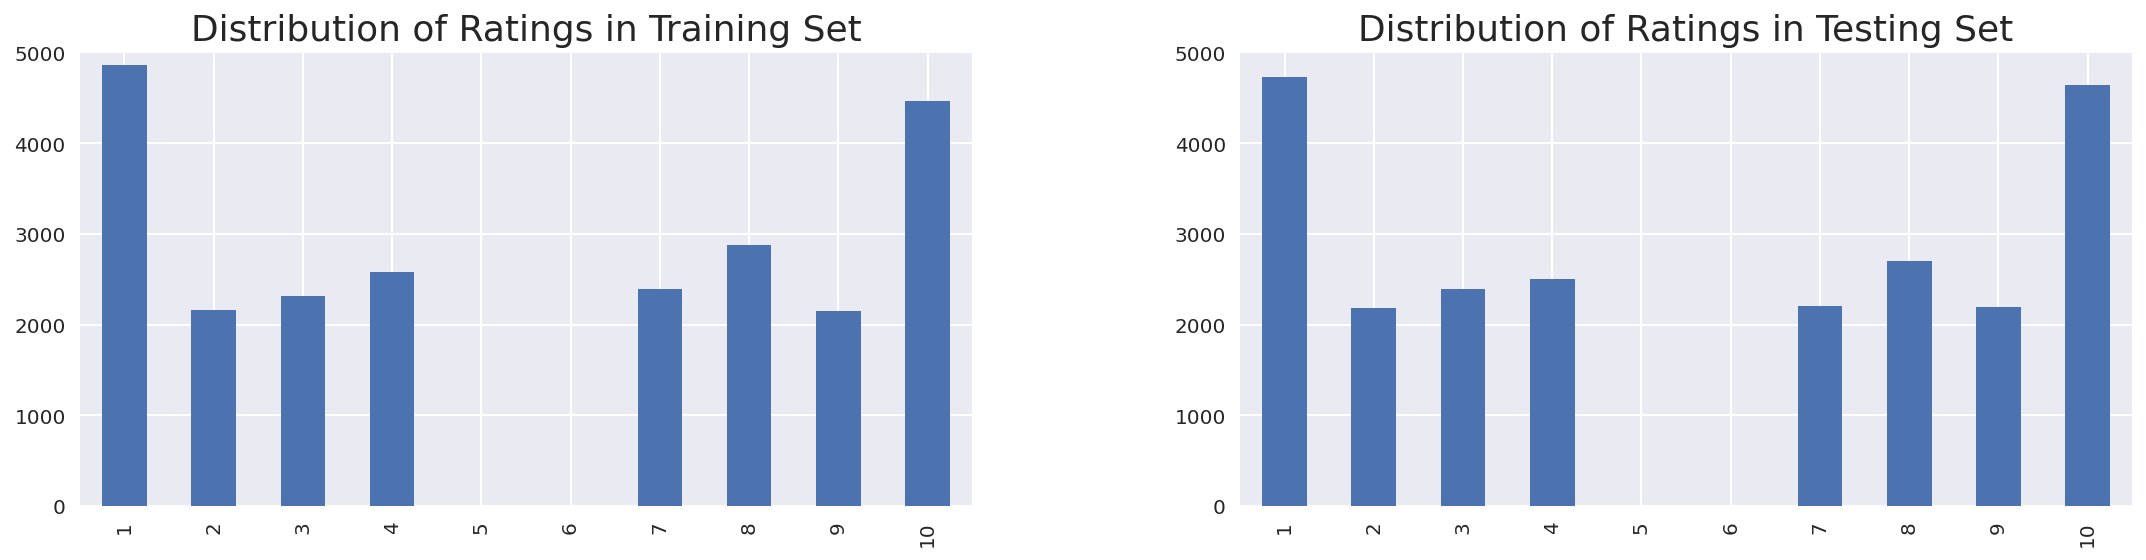

In [ ]:
#Create figure with subplots.
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

#Set first axis.
ax = axs[0]

#Obtain value counts for ratings in the training column and plot results.
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('Distribution of Ratings in Training Set', fontsize=18)

#Set second axis.
ax = axs[1]

#Obtain value counts for ratings in the testing column and plot results.
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('Distribution of Ratings in Testing Set', fontsize=18)

fig.tight_layout()
fig.subplots_adjust(wspace=.3)
plt.show()

2.3 Notes Continued: From these plots we can see that our concern does not apply to this dataset - that is, there are no boarderline ratings which may be taken as positive by some and negative by others. The reviews chosen appear to all have come from individuals who rated the relevant movies as between 1 and 4 or between 7 and 10; there are no reviews with ratings of 5 or 6 in this dataset. While this may be good for building our models, it might affect the real-world accuracy of our model, as ratings of 5 or 6 might be accompanied by reviews that offer both positive and negative takes on the respective movie; if this is the case, then our model might not be able to properly classify a review as positive or negative.

As one more point of analysis, let us visualize the number of reviews of different polarities (pos or negative) per year in both the training and testin dataset. This might not be essential information when it comes to building our later model, but it could be a useful bit of information if one were to develop a model for predicting whether a review is positive or negative by also takign into account the year a movie was released.

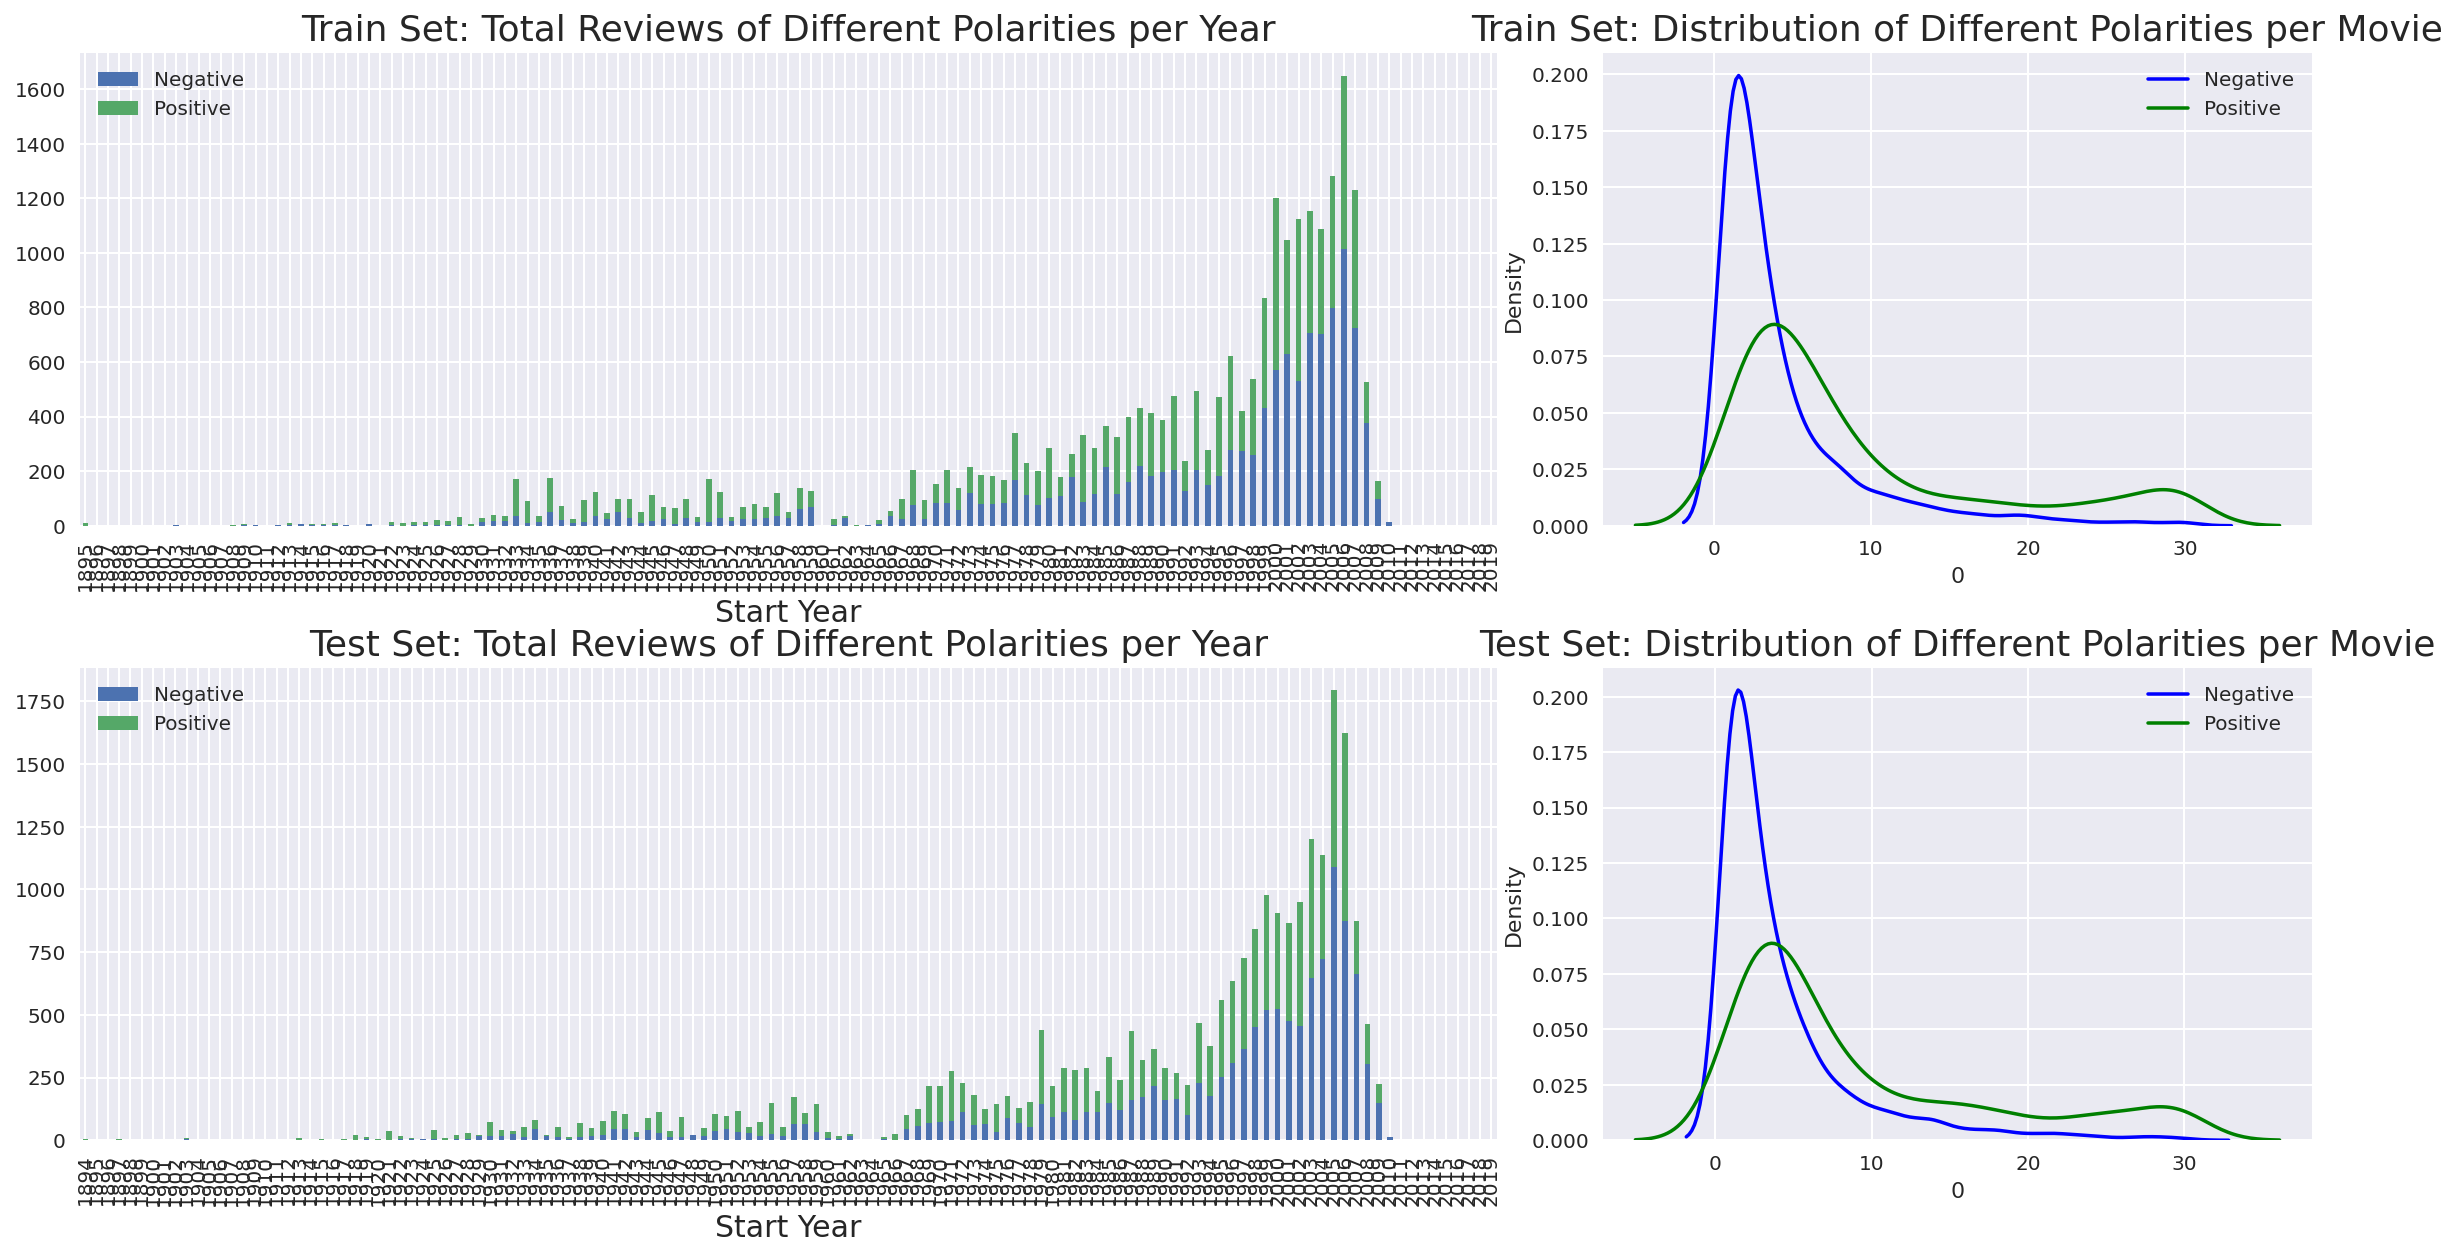

In [ ]:
#Create figure with subplots.
fig, axs = plt.subplots(2, 2, figsize=(20, 10), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

#Use for loop to iterate through axes.
for i in range(0, 2, 1):
    if i == 0:
        dset = 'train'
    else:
        dset = 'test'
    
    #Set first axis.
    ax = axs[i][0]

    #Create bar plot to visualize distribution per year.
    dft = df_reviews.query('ds_part == @dset').groupby(['start_year', 'pos'])['pos'].count().unstack()
    dft.index = dft.index.astype('int')
    dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
    dft.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{dset.title()} Set: Total Reviews of Different Polarities per Year', fontsize=18)
    ax.legend(labels=['Negative', 'Positive'], loc=0)
    ax.set_xlabel('Start Year', fontsize=15)
    
    #Set second axis.
    ax = axs[i][1]

    #Create KDE plot to visualize distribution.
    dft = df_reviews.query('ds_part == @dset').groupby(['tconst', 'pos'])['pos'].count().unstack()
    sns.kdeplot(dft[0], color='blue', label='Negative', kernel='epa', ax=ax)
    sns.kdeplot(dft[1], color='green', label='Positive', kernel='epa', ax=ax)
    ax.legend()
    ax.set_title(f'{dset.title()} Set: Distribution of Different Polarities per Movie', fontsize=18)
    
fig.subplots_adjust(hspace=.3, wspace=.1)

2.3 Notes Continued: From these plots we can see that the number of reviews made greatly increased over the last two decades; this is the same conclusion reached in subsection 2.1. Regarding the distribution of reviews, it appears that the ratio of positive to negative reviews became more equalized with later release dates, except for movies released over the last couple of years. From the KDE plot, we see that there is a greater proportion of negative reviews for movies with fewer reviews than for those with a high-number of reviews. We see a similar pattern with positive reviews, though it appears that for each dataset the probability of a review being positive is higher than the probability of it being negative for movies with 5 or more reviews. Overall, the distribution of reviews, as well as the distribution of positive to negative reviews, appears very similar for both training and testing datasets.

### Exploratory Data Analysis Conclusion

As a result of our exploratory data analysis, we've come to the following conclusions:

1. 2006 was the year with the most movies released, which also happens to be the year with the greatest number of reviews. The total number of movies sharply declined after 2006, which is around the time of the 2008 financial crisis. 


2. The majority of movies have a low number of reviews - that is, most movies in the dataset have only 1 review, and the number of movies with a higher number of reviews tends to decrease with each increase in review number. The exception to this is movies with 30 reviews, which we assumed might account for the most popular movies listed in the dataset.


3. Movies with 30 reviews have a mean rating of 8, and a higher interquartile rating range than movies with fewer reviews. This appears to justify our belief that movies with 30 reviews are more popular than movies with fewer reviews.


4. There is a roughly 50:50 split between positive and negative reviews in the dataset. There is also a rouhgly even split of reviews and ratings between datasets. In neither the training or testing dataset are there ratings of 5 or 6 - this is good, as such ratings might be accompanied by reviews that would be more neutral and, therefore, difficult for our later models to accuratly interpret.


5. The distribution of reviews, as well as positive and negative ratings, for the training and testing datasets is very similar. This is desirable, as it will ensure that our models will be tested on a dataset that contains roughly the same distribution of positive and negative reviews that our training set has, which means that we will not have to worry about class imbalances.


In the following section, we will develop an evaluation procedure that can be used for all of our models.

## Create Evaluation Procedure

In this section we develope an evaluation routine that can be used to evaluate all models we create. This function will obtain predictins from the models, as well as the predicted probabilities, and create ROC and PRC plots, as well as plot the F1 scores at various thresholds. It will also save the critical stats to a dictionary, which will be printed as a DataFrame. The critical stats that will be displayed are as follows:

1. Accuracy - Number of correct predictions over total predictions. A high accuracy score is good when there is an equal number of observations beloning to each class.


2. F1 - Harmonic mean between precision and recall. We use the F1 score to find the optimal balance between precision and recall.


3. APS - Average precision score across all thresholds. It is essentially the area under the precision-recall score. The higher the score the better.


4. ROC AUC - The area under the Receiver Operating Characteristics curve, which plots a model's false positive rate against its true positive rate. The higher the score the better the model.


In [ ]:
#Create function to evaluate models.
def evaluate_model(model_name, model, train_features, train_target, test_features, test_target):
    
    #Dictionary for evaluation stats.
    eval_stats = {}
    
    #Create figure with subplots to visualize stats.
    fig, axs = plt.subplots(1, 3, figsize=(18, 6)) 
    fig.suptitle(f'{model_name} Model Evaluation', fontsize=18)
    #For loop to calculate stats for training and testing sets.
    for type, features, target in (('Train', train_features, train_target), ('Test', test_features, test_target)):
        
        #Evaluation stats for each dataset.
        eval_stats[type] = {}
        
        #Model prediction.
        pred_target = model.predict(features)
        #Model predicted probabilities.
        pred_proba = model.predict_proba(features)[:, 1]
        
        #F1 scores for model at different thresholds.
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        #ROC_AUC score for model. Save variables for graph.
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        #PRC score for model. Save variables for graph.
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        #Create different colored lines based on whether train or test dataset.
        if type == 'Train':
            color = 'blue'
        else:
            color = 'green'

        #Plot F1 score at different thresholds.
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        #Create crosses at different thresholds.
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('Threshold', fontsize=12)
        ax.set_ylabel('F1', fontsize=12)
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score', fontsize=15) 

        #Create ROC plot.
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        #Create crosses at different thresholds.
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR', fontsize=12)
        ax.set_ylabel('TPR', fontsize=12)
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve', fontsize=15)
        
        #Create PRC plot.
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        #Create crosses at different thresholds.
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('Recall', fontsize=12)
        ax.set_ylabel('Precision', fontsize=12)
        ax.legend(loc='lower center')
        ax.set_title(f'PRC', fontsize=15)        

        #Add stats to evaluation dictionary.
        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    #Create DataFrame from evaluation stats.
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    display(df_eval_stats)
    
    return

## Split Data into Training and Testing Sets

In this section we will split the data into training and testing datasets. Whereas we would normally have to split the data in such a way as to balance target classes in each set, this dataset has already been divided. In the DataFrame, there is a column labeled 'ds_part'; the values in this column ascribe an observation to either the training or testing dataset. That being said, in this section we will simply use the 'query' method to split the data into the appropriate sets.

In [ ]:
#Split data according to 'ds_split' value.
train = df_reviews.query('ds_part == "train"').copy()
test = df_reviews.query('ds_part == "test"').copy()

#Create target datasets.
train_y = train['pos']
test_y= test['pos']

#Create feature datasets.
train_X = train.rev_norm
test_X = test.rev_norm

print(f'Shape of training dataset: {train.shape}')
print(f'Shape of testing dataset: {test.shape}')

Shape of training dataset: (23796, 19)
Shape of testing dataset: (23535, 19)


In this section we split the data into training and testing datasets based on each observation's 'ds_part' value. We ensured that our target datasets only contain an observation's 'pos' value, which indicates whether the review is positive or negative. The feature datasets contain the normalized reviews - that is, they are reviews for which we deteled all characters except for letters and apostrophes.

In the next section, we will build and evaluate a number of classification models.

## Train and Test Models

In this section, we will build and evaluate 5 different classification models with the goal of building one that predicts whether a review is positive or negative with an F1 score greater than .85. To evaluate the models, we will be using the 'evaluate_model' function we developed in section 3.

### Model 1 - Dummy Model

,Train,Test
Accuracy,0.5,0.5
F1,0.5,0.5
APS,0.5,0.5
ROC AUC,0.5,0.5


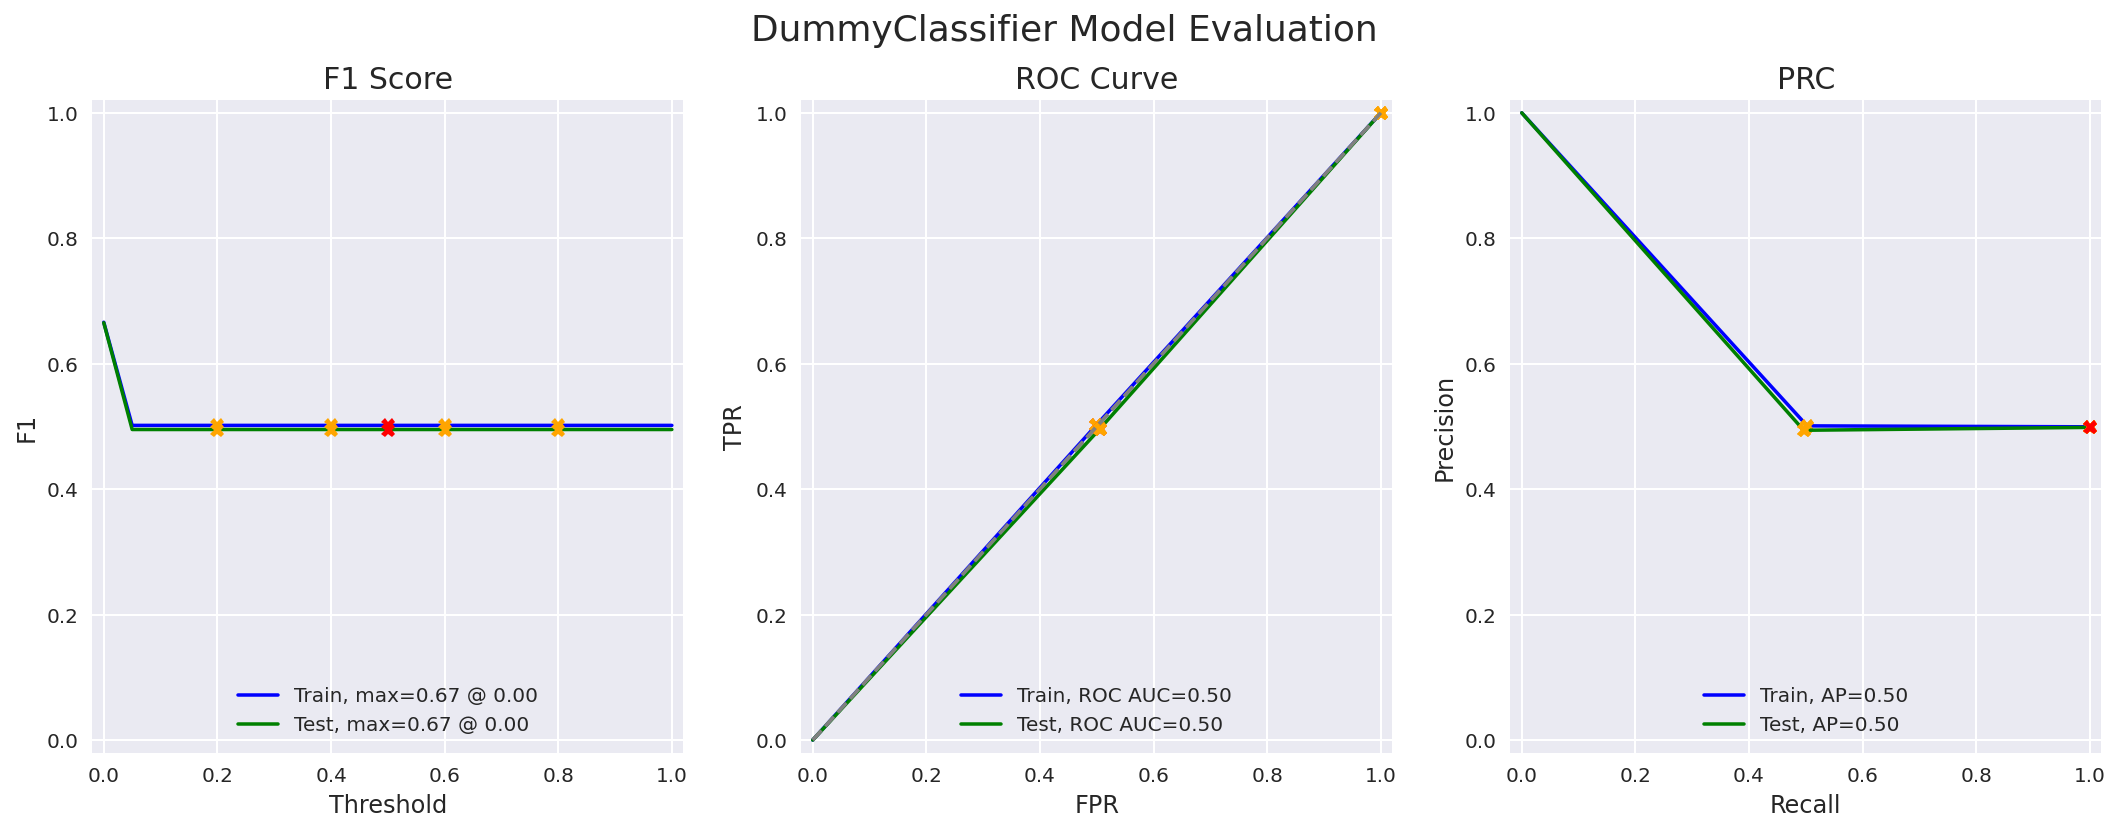

In [ ]:
dummy_model = DummyClassifier(strategy='stratified', random_state=12345)
dummy_model.fit(train_X, train_y)

evaluate_model('DummyClassifier', dummy_model, train_X, train_y, test_X, test_y)

5.1 Notes: As expected, our dummy model 'predicted' the correct answers with an accuracy score of .5 in both the training and testing sets. The F1, APS, and AUC-ROC scores were also .5. These scored indicate that our dummy model classifies observations in such a manner that is no better than chance. This model will serve as one benchmark for determining how well our later models perform.

### Model 2 - NLTK, TF-IDF, LR

Our first second will be a logistic regression model with tf-idf vectorized reviews. During vectorization, we will remove common stop words from each review. Prior to vectorization, we will use NLTK's WordNetLemmatizer to lemmatize the reviews in the test and training sets.

In [ ]:
#Create lemmatization function.
def lemmatize(corpus):
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.word_tokenize(corpus)
    lemmatized = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized

In [ ]:
#Lemmatize words
train_X_lem_nltk = train_X.progress_apply(lemmatize)
test_X_lem_nltk = test_X.progress_apply(lemmatize)

100%|██████████| 23535/23535 [00:42<00:00, 553.69it/s]


,Train,Test
Accuracy,0.94,0.88
F1,0.94,0.88
APS,0.98,0.95
ROC AUC,0.98,0.95


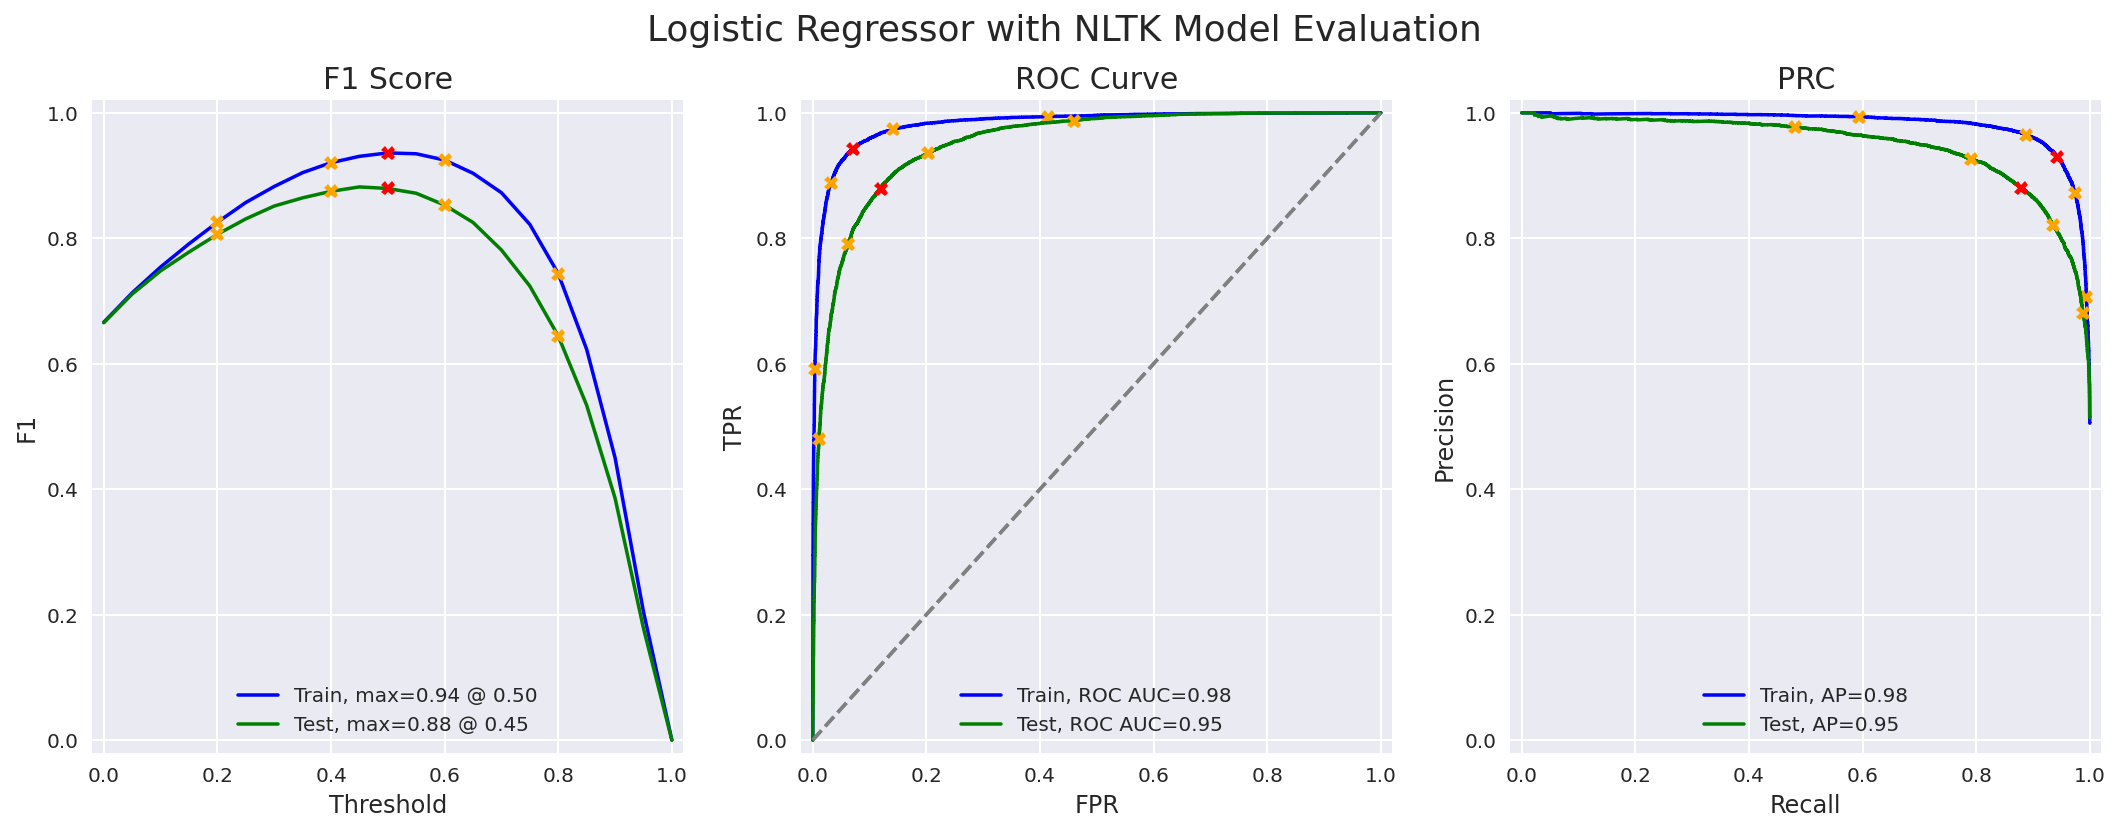

In [ ]:
#Create list of stopwords.
stop_words = set(stopwords.words('english'))

#Create a TF-IDF vectorizer.
model2_tf_idf = TfidfVectorizer(stop_words=stop_words)

#Fit vectorizer to training dataset. Transform training and testing da
model2_train_X = model2_tf_idf.fit_transform(train_X_lem_nltk)
model2_test_X = model2_tf_idf.transform(test_X_lem_nltk)

#Create logistic regression model and fit it.
model2 = LogisticRegression(random_state=12345, solver='saga')
model2.fit(model2_train_X, train_y) ;

#Evaluate model.
evaluate_model('Logistic Regressor with NLTK', model2, model2_train_X, train_y, model2_test_X, test_y)

#Delete unnecessary variables.
del train_X_lem_nltk
del test_X_lem_nltk

5.2 Notes: As we can see from the plots, our logistic regression model performed far better than the dummy model. In building this model, we first lemmatized the words in each of the reviews in both the training and testing datasets. We then vectorized the words and trained our logistic model using the vectorized and lemmatized datasets. Our model has a near-perfect average precision score as well as AUC ROC score. As far as F1 is concerned, the score for the training set was higher than the testing set; nonetheless, our test set produced a score of .88, which is higher than the minimum score specified by the company (i.e., .85).

In the next subsection, we will build a similar model, though using spaCy to lemmatize the words.

### Model 3 - spaCy, TF-IDF, LR

Our third model will be similar to the model in subsection 5.2, except that we will use spaCy to lemmatize the words for each review. We will then vectorize the words according to their TF-IDF and create, train, and test a linear regression model.

In [ ]:
#Create a spacy object.
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

#Obtain set of stopwords from spacy.
stop_words = nlp.Defaults.stop_words

#Create function to lemmatize words.
def spacy_lemmatize(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(tokens)

In [ ]:
#Lemmatize reviews in training and testing datasets.
train_X_lem_spacy = train_X.progress_apply(spacy_lemmatize)
test_X_lem_spacy = test_X.progress_apply(spacy_lemmatize)

100%|██████████| 23535/23535 [04:53<00:00, 80.05it/s] 


,Train,Test
Accuracy,0.93,0.87
F1,0.93,0.87
APS,0.98,0.94
ROC AUC,0.98,0.95


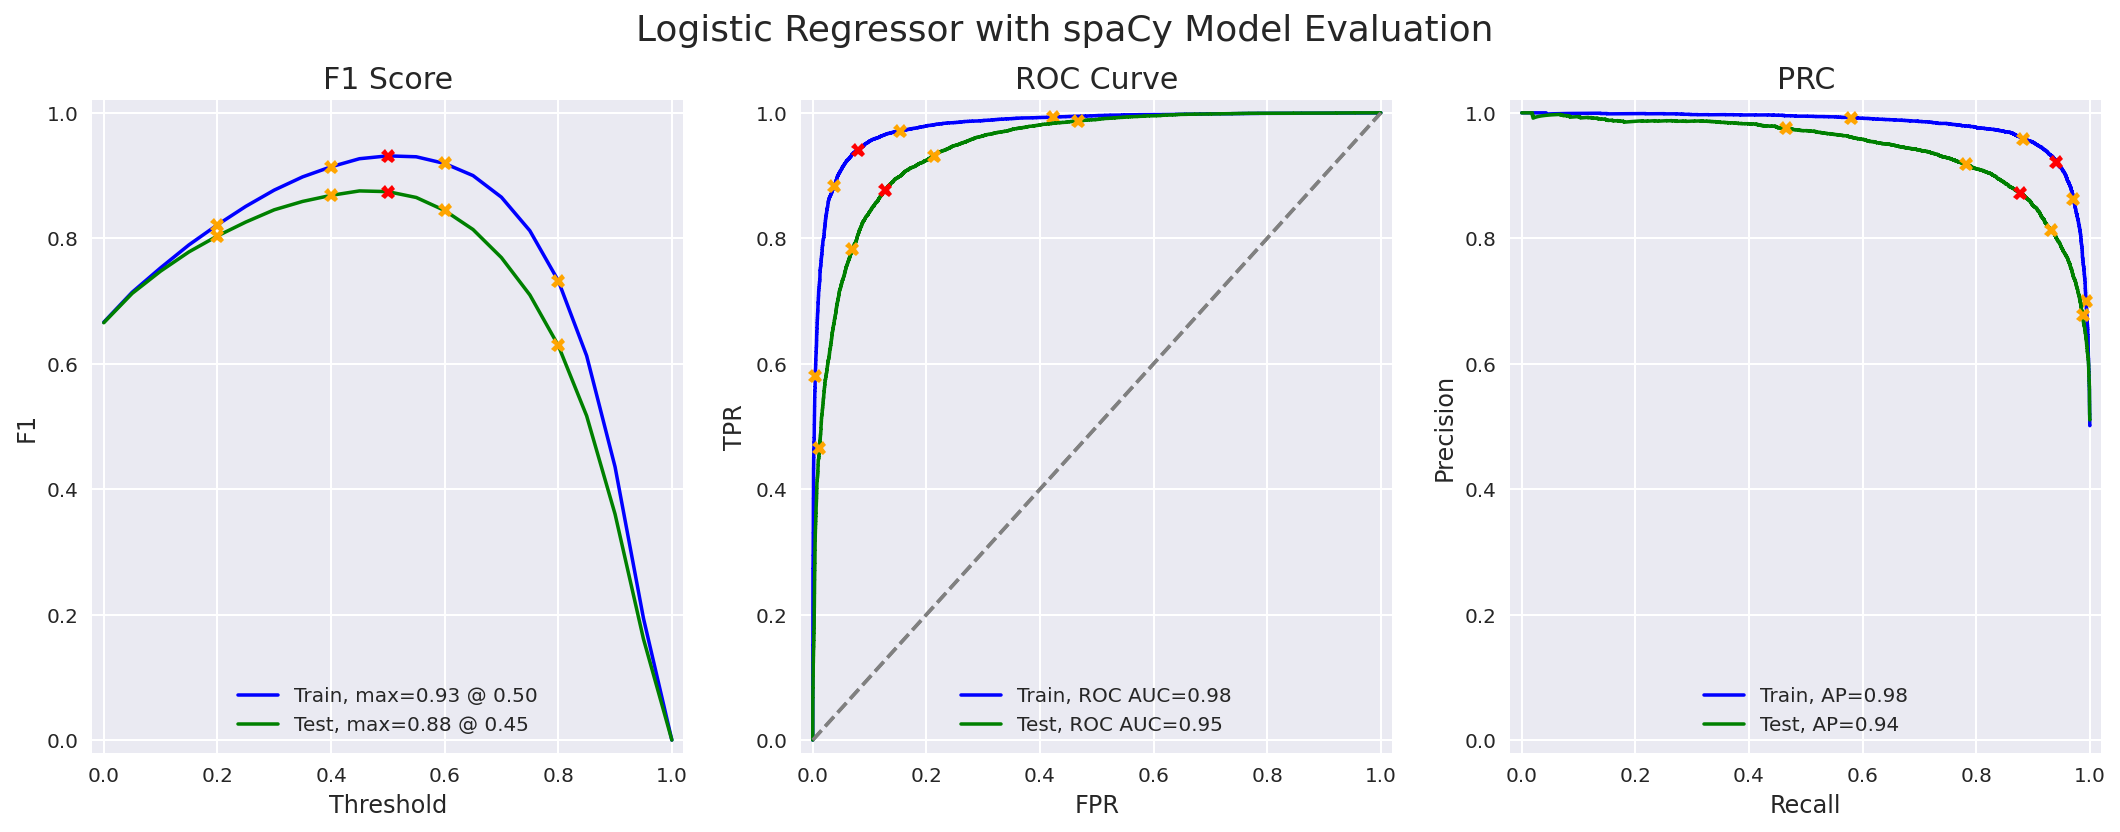

In [ ]:
#Create new instance of vectorizer.
model3_tf_idf = TfidfVectorizer(stop_words=stop_words)

#Fit vectorizer to training dataset. Transform training and testing da
model3_train_X = model3_tf_idf.fit_transform(train_X_lem_spacy)
model3_test_X = model3_tf_idf.transform(test_X_lem_spacy)

#Create logistic regression model and fit it.
model3 = LogisticRegression(random_state=12345, solver='saga')
model3.fit(model3_train_X, train_y) ;

#Evaluate model.
evaluate_model('Logistic Regressor with spaCy', model3, model3_train_X, train_y, model3_test_X, test_y)

5.3 Notes: It appears that our logistic regression model, when tokenized using spaCy to tokenize the reviews, provides slightly lower accuracy and F1 scores than the same model where we tokenized reviews using NLTK. That being said, the difference in the scores between the two models is approxomately .01 points for each metric, which is quite small. Given the F1 score on the testing datasets, this model meets the minimum-score criteria specified by the Film Junky Union.

In the following subsection, we will train and test an LGBM Classifier model.

### Model 4 - spaCy, TF-IDF, LGBMClassifier

In this subsection, we would like to test whether a LGBM Classifier would offer a higher F1 score than our previous model. In training and testing this model, we will use the same datasets we trained and tested our previous model on - that is, datasets where the reviews are tokenized/lemmatized using spaCy and vectorized according to each words TF-IDF scores. 

,Train,Test
Accuracy,0.91,0.85
F1,0.91,0.85
APS,0.97,0.93
ROC AUC,0.97,0.93


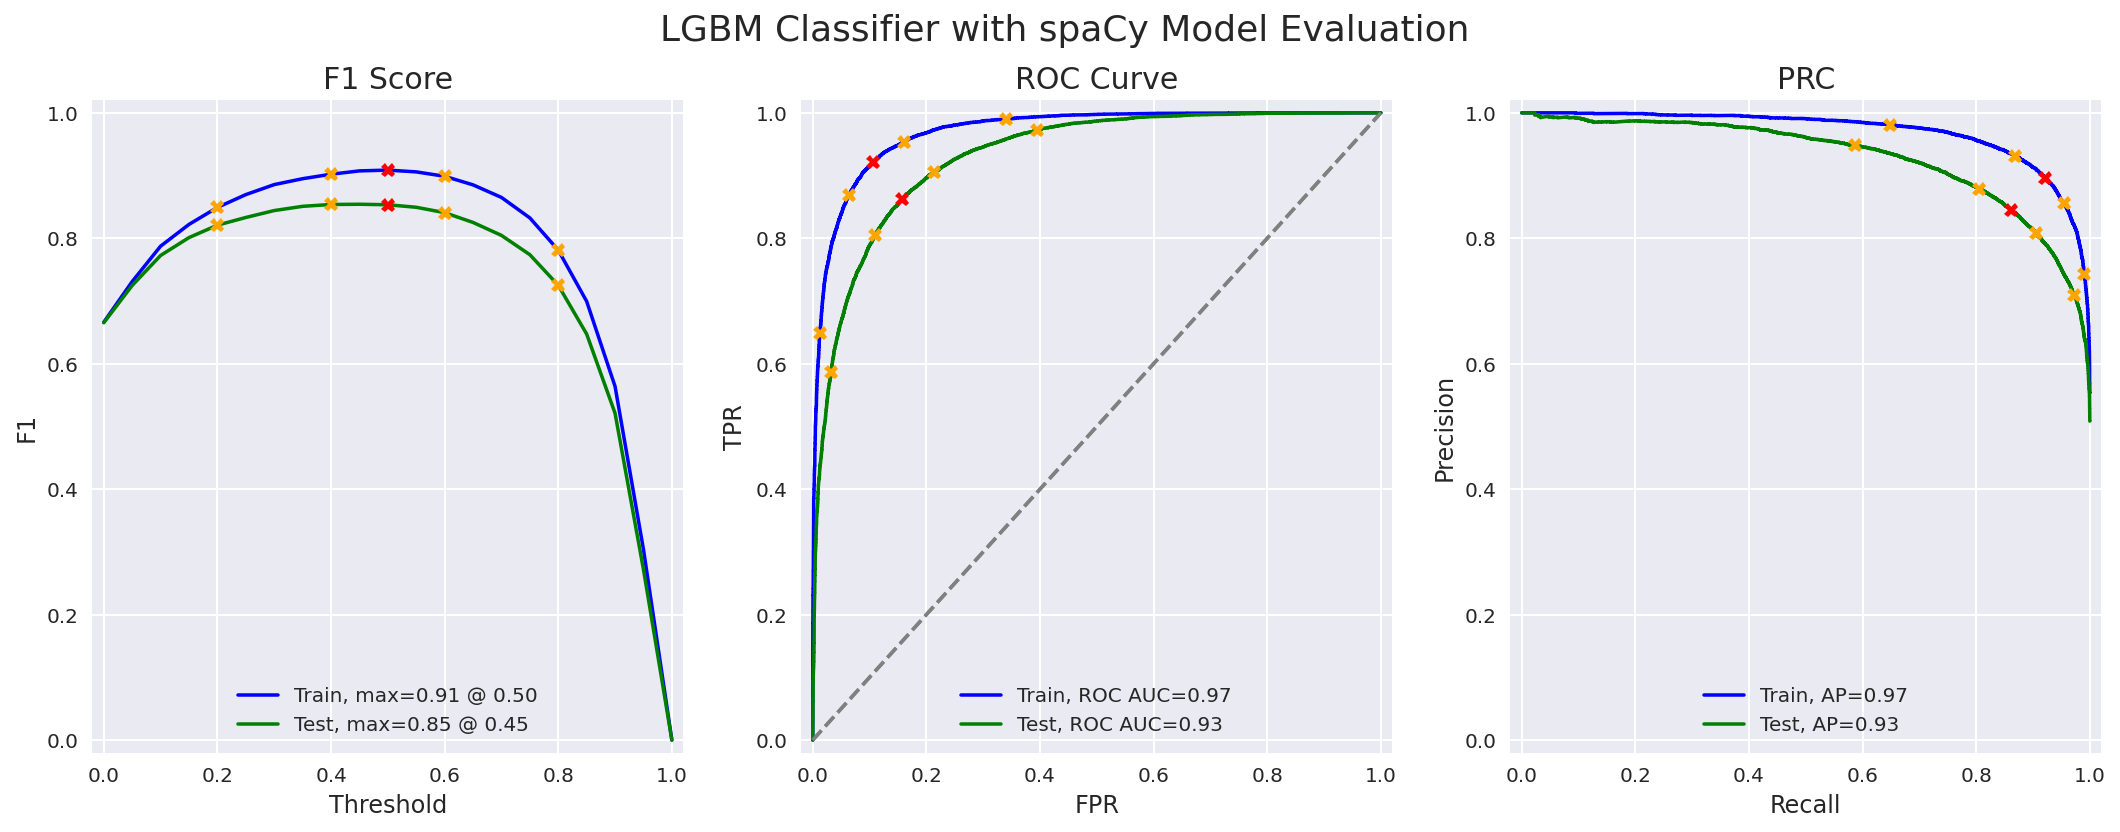

In [ ]:
#Create LGBMClassifier model.
model4 = LGBMClassifier(random_state=12345)

#Fit model to previously tokenized/lemmatize and vectorized datasets.
model4.fit(model3_train_X, train_y)

#Evaluate model.
evaluate_model('LGBM Classifier with spaCy', model4, model3_train_X, train_y, model3_test_X, test_y)

5.4 Notes: It appears that our LGBMClassifier does not perform as well as our previous model. Using the same datasets, the Logistic Regression model provides higher scores for each metric than our LGBM Classifier model. Nonetheless, the LGBM Classifier model's F1 score for the testing dataset is .85, which mean that it meets the Film Junky Union's minimum threshold score for a review classification model.

In the following subsection, we will train and test a BERT model to accurately classify the reviews.

In [ ]:
#Delete unnecessary variables.
del train_X_lem_spacy
del test_X_lem_spacy

###  Model 5 - BERT

BERT (Bidirectional Encoder Representations from Transformers) is a transfomer-based machine learning technique developed by Google for natural language processing. In this subsection, we will build, train, and test our own BERT + LR model and examine its metric scores in light of our previous models.

In [ ]:
#Initialize the BERT tokenizer.
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')

#Configure and intialize a BERT model.
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model5 = transformers.BertModel.from_pretrained('bert-base-uncased') ;

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
#Function to create embeddings from ewviews.
def BERT_embed(texts, train_or_test, max_length=512, batch_size=25, force_device=None, disable_progress_bar=False):
    
    #Create lists for IDs and attention mask.
    ids_list = []
    attention_mask_list = []

    #For loop to obtains IDs from tokenizer.
    for review in tqdm(texts, disable=disable_progress_bar, desc=f"{train_or_test} Tokenizer Progress"):
        #Tokenize review.
        ids = tokenizer.encode(review, add_special_tokens=True, truncation=True, max_length=max_length)
        #Pad review to max_length.
        padded = np.array(ids + [0] * (max_length - len(ids)))
        #Create attention mask.
        attention_mask = np.where(padded != 0, 1, 0)
        #Add ids and mask to appropriate lists.
        ids_list.append(padded)
        attention_mask_list.append(attention_mask)
    
    #Specify whether to use CPU or GPU for processing.
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model5.to(device)
    if not disable_progress_bar:
        print(f'Using the {device} device.')
    
    #Create list to store embeddings.
    embeddings = []
    
    #For loop to obtain embeddings in batches.
    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar, desc=f"{train_or_test} Embeddings Progress"):
        
        #Obtain IDs batch.
        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        #Obtain attention mask batch.
        attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)]).to(device)
                  
        #Evaluate model with no gradient. This would not be the case if training our own models.
        with torch.no_grad():            
            model5.eval()
            batch_embeddings = model5(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        
        #Append embeddings. Only take output for the CLS token, which is the first vector for each observation.
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
    
    #Concatenate and return embeddings.
    return np.concatenate(embeddings)

5.5 Notes: Here we will first attempt to load our embeddings from a saved file. We previously ran the above function and saved our results because it was a time-consuming process and we wanted to be able to rerun our code without having to create embeddings again.

In [ ]:
try:
    #Try to load embedded data from locally saved file.
    with np.load('Data/features_bert.npz') as data:
        train_X_BERT = data['train_features']
        test_X_BERT = data['test_features']
except:
    #Obtain embeddings for training and testing sets.
    train_X_BERT = BERT_embed(train_X, 'Training Set')
    test_X_BERT = BERT_embed(test_X, 'Testing Set')
    
    #Save embeddings for future use.
    np.savez_compressed('Data/features_bert.npz', train_features=train_X_BERT, test_features=test_X_BERT)

5.5 Notes Continued: Now that we have our embeddings loaded, we will use a simple logistic regression model to classify our reviews.

,Train,Test
Accuracy,0.87,0.86
F1,0.87,0.86
APS,0.94,0.94
ROC AUC,0.94,0.94


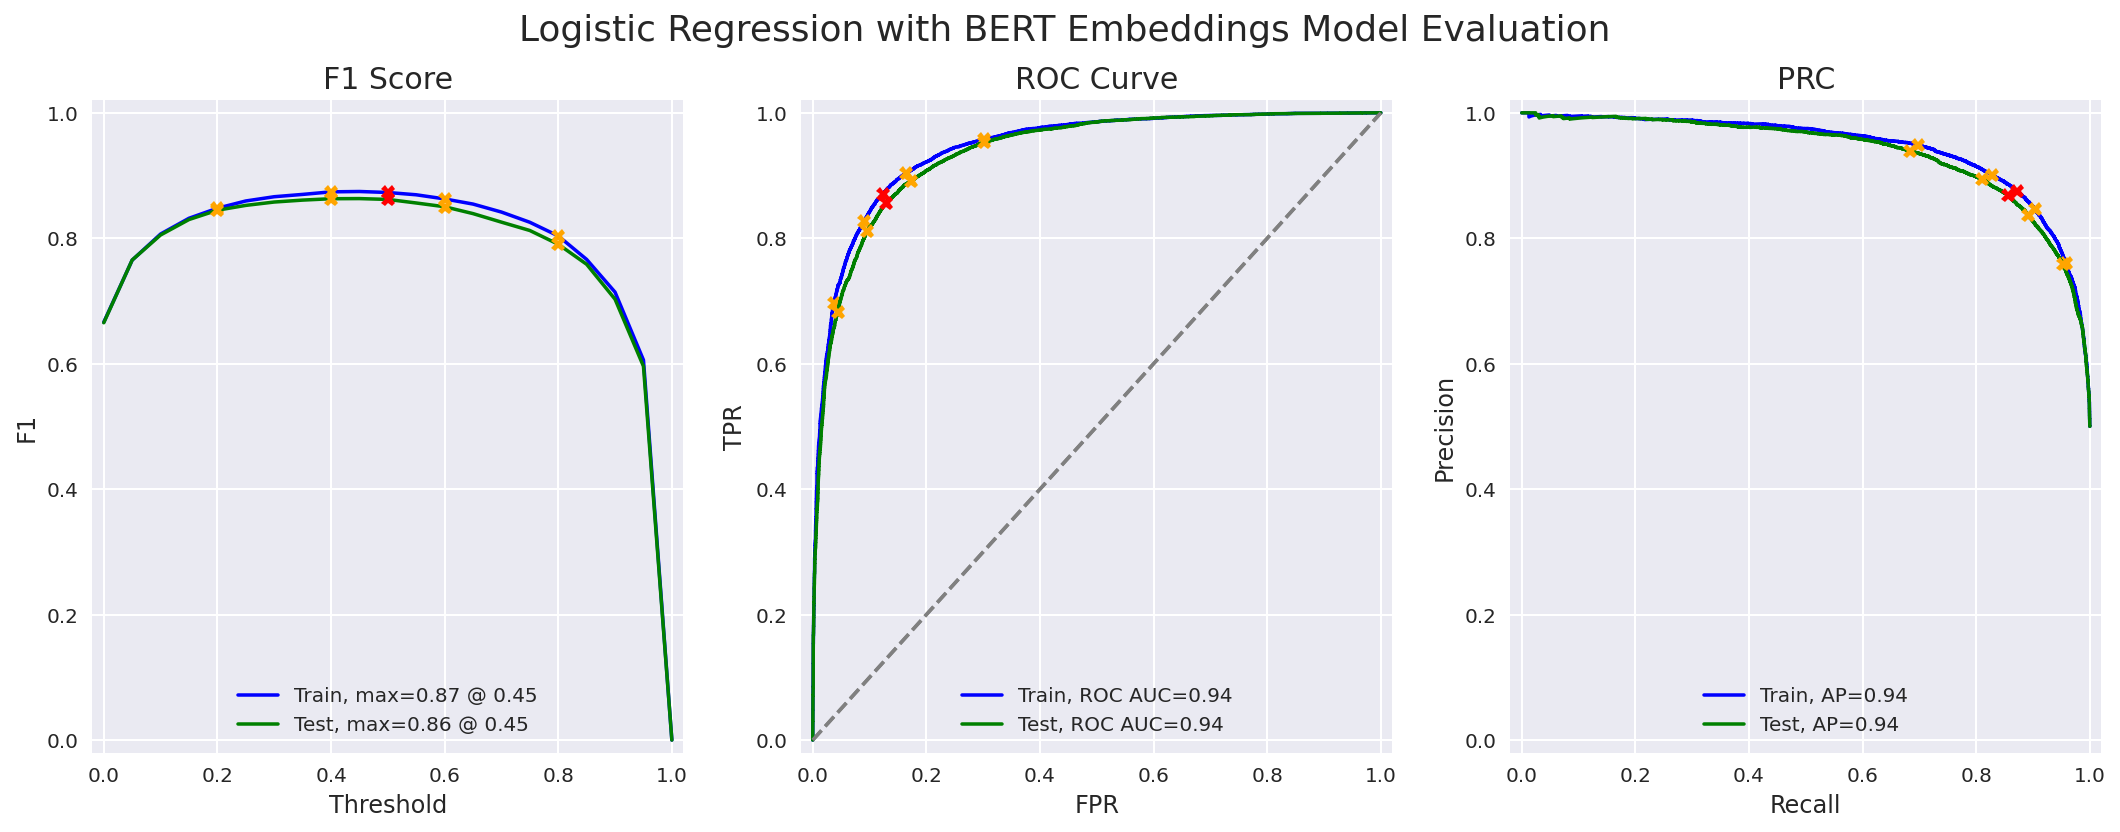

In [ ]:
#Create logistic regression model.
model5_LR = LogisticRegression()

#Fit the model to the embedded training features.
model5_LR.fit(train_X_BERT, train_y)

#Evaluate model.
evaluate_model('Logistic Regression with BERT Embeddings', model5_LR, train_X_BERT, train_y, test_X_BERT, test_y)

5.5 Notes Continued: From our results we can see that the BERT + LR model meets the Film Junky Union's standards for a review classifying model. Our model, while only providing an F1 score of .86, is better than our LGBM Classifier model, and provided similar scores to the logistic regression models tokenized with NLTK and spaCy. 

### Train and Test Models Conclusion

In this section we trained a number of models using various NLP methods for converting text into vectors. Among these methods is tokenization using NLTK, spaCy, and BERT, as well as vectorization using TF-IDF. Overall, we found that model 2, which uses a combination of NLTK, TF-IDF and logistic regression, provided the highest F1 score for the training datasets (i.e., .88). While the other models, except for the dummy model, provided similar scores, we believe that model 2's providing the best F1 score is a positive sign because it took a significantly shorter time to obtain predictions from the model than model 5, which created embeddings using BERT.

In the following section, we will test our models on reviews that we've written ourselves.

## Test Models on New Reviews

In this section, we will test our models using reviews that we've written ourselves. We will construct the reviews in such a way that there is an equal class balance between positive and negative reviews. After appropriately converting our texts into the relevant format for each model, we will obtain predictions from each model concerning the sentiment of our reviews. We will then display the actual sentiment and predicted sentiments for each review for each model.

### Create 'Fake' Reviews

In [ ]:
#Create DataFrame with personally-generated reviews.
my_reviews = pd.DataFrame([
    'I hated this movie. I expected more and was really dissapointed',
    'This movie made me fall asleep in the theater. It was pretty boring.',
    'It is not every day that you come across such a captivating and amazing movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'Trillogies aren\'t often good, which is why I was so surprised how great this movie was!',
    'This is a movie I could take or leave. It was not the most amazing, but it was still enjoyable. I would watch it again.',
    'This movie just rehashed the same old, tired jokes as every other b-movie film. It lacked originality and was of poor quality overall.',
    'I am usually hesitant with starting new series, but I fell in love with this one instantly. After the first episode I could not stop! I loved every season and hope they make more'
], columns=['review'])

#Add column to reviews to indicate whether reviews are positive or negative.
my_reviews['pos'] = [0, 0, 1, 0, 1, 1, 0, 1]

#Normalize reviews.
my_reviews['review_norm'] = my_reviews['review'].apply(reduce_char)

#Display DataFrame.
display(my_reviews.head())

,review,pos,review_norm
0,I hated this movie. I expected more and was re...,0,i hated this movie i expected more and was rea...
1,This movie made me fall asleep in the theater....,0,this movie made me fall asleep in the theater ...
2,It is not every day that you come across such ...,1,it is not every day that you come across such ...
3,Even the actors looked really old and disinter...,0,even the actors looked really old and disinter...
4,"Trillogies aren't often good, which is why I w...",1,trillogies aren't often good which is why i wa...


6.1 Notes: As can be seen, each review has been processed in such a way that they only contain letters and apostrophes. We also added the sentiment for each review we created in order to be able to compare the actual sentiment with the sentiments predicted by each model.

### Model 2 - NLTK, TF-IDF, LR

In [ ]:
#Lemmatize reviews.
texts = my_reviews['review_norm'].apply(lemmatize)

#Vectorize reviews and obtain model predictions.
pred_prob = model2.predict_proba(model2_tf_idf.transform(texts))[:, 1]

#Print actual vs predicted sentiment values with review sample.
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'Actual: {my_reviews.pos[i]} | Predicted: {0 if pred_prob[i] < .5 else 1} | Text: {review[:50]}')

Actual: 0 | Predicted: 0 | Text: i hated this movie i expected more and wa really d
Actual: 0 | Predicted: 0 | Text: this movie made me fall asleep in the theater it w
Actual: 1 | Predicted: 1 | Text: it is not every day that you come across such a ca
Actual: 0 | Predicted: 0 | Text: even the actor looked really old and disinterested
Actual: 1 | Predicted: 1 | Text: trillogies are n't often good which is why i wa so
Actual: 1 | Predicted: 1 | Text: this is a movie i could take or leave it wa not th
Actual: 0 | Predicted: 0 | Text: this movie just rehashed the same old tired joke a
Actual: 1 | Predicted: 1 | Text: i am usually hesitant with starting new series but


6.2 Notes: Model 2, which we found to have the highest F1 score on the testing datasets in the previous section, has accurately predicted the sentiment of each review.

### Model 3 - spaCy, TF-IDF, LR

In [ ]:
#Lemmatize reviews.
texts = my_reviews['review_norm'].apply(spacy_lemmatize)

#Vectorize reviews and obtain model predictions.
pred_prob = model3.predict_proba(model3_tf_idf.transform(texts))[:, 1]

#Print actual vs predicted sentiment values with review sample.
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'Actual: {my_reviews.pos[i]} | Predicted: {0 if pred_prob[i] < .5 else 1} | Text: {review[:50]}')

Actual: 0 | Predicted: 0 | Text: hate movie expect dissapointe
Actual: 0 | Predicted: 0 | Text: movie fall asleep theater pretty boring
Actual: 1 | Predicted: 1 | Text: day come captivate amazing movie
Actual: 0 | Predicted: 0 | Text: actor look old disinterested get pay movie soulles
Actual: 1 | Predicted: 1 | Text: trillogie good surprised great movie
Actual: 1 | Predicted: 1 | Text: movie leave amazing enjoyable watch
Actual: 0 | Predicted: 0 | Text: movie rehash old tired joke b movie film lack orig
Actual: 1 | Predicted: 1 | Text: usually hesitant start new series fall love instan


6.3 Notes: As with Model 2, Model 3 has accurately predicted the sentiment for each of our 'fake' reviews. 

### Model 4 - spaCy, TF-IDF, LGBMClassifer

In [ ]:
#Use same lemmatized and vectorized reviews as with previous model.
pred_prob = model4.predict_proba(model3_tf_idf.transform(texts))[:, 1]

#Print actual vs predicted sentiment values with review sample.
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'Actual: {my_reviews.pos[i]} | Predicted: {0 if pred_prob[i] < .5 else 1} | Text: {review[:50]}')

Actual: 0 | Predicted: 1 | Text: hate movie expect dissapointe
Actual: 0 | Predicted: 0 | Text: movie fall asleep theater pretty boring
Actual: 1 | Predicted: 1 | Text: day come captivate amazing movie
Actual: 0 | Predicted: 0 | Text: actor look old disinterested get pay movie soulles
Actual: 1 | Predicted: 1 | Text: trillogie good surprised great movie
Actual: 1 | Predicted: 1 | Text: movie leave amazing enjoyable watch
Actual: 0 | Predicted: 0 | Text: movie rehash old tired joke b movie film lack orig
Actual: 1 | Predicted: 1 | Text: usually hesitant start new series fall love instan


6.4 Notes: Unlike with the previous models, Model 4 did not accurately predict the sentiment for each review. While it only misclassified one review, we are disheartened by the fact that our model classified the review, which contains the words "hate" and "dissapointed", as positive. These words are often strong signifiers of negative sentiment; as such, we would expect a sentiment analysis model to accurately classify such a review as negative.

### Model 5 - BERT, LR

In [ ]:
#Make embeddings and obtain model predictions.
pred_prob = model5_LR.predict_proba(BERT_embed(my_reviews['review_norm'], 'Testing', disable_progress_bar=True))[:, 1]

#Print actual vs predicted sentiment values with review sample.
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'Actual: {my_reviews.pos[i]} | Predicted: {0 if pred_prob[i] < .5 else 1} | Text: {review[:50]}')

Actual: 0 | Predicted: 0 | Text: hate movie expect dissapointe
Actual: 0 | Predicted: 1 | Text: movie fall asleep theater pretty boring
Actual: 1 | Predicted: 1 | Text: day come captivate amazing movie
Actual: 0 | Predicted: 0 | Text: actor look old disinterested get pay movie soulles
Actual: 1 | Predicted: 1 | Text: trillogie good surprised great movie
Actual: 1 | Predicted: 1 | Text: movie leave amazing enjoyable watch
Actual: 0 | Predicted: 0 | Text: movie rehash old tired joke b movie film lack orig
Actual: 1 | Predicted: 1 | Text: usually hesitant start new series fall love instan


6.5 Notes: Similarly to the previous model, Model 5 misclassified one review. While the review it misclassified was not as overtly negative as the review misclassified by Model 4, it nonetheless included the words "boring" and "sleep", which are also often found to convey negative sentiments towards a movie.

### Fake Review Testing Conclusion

In this section we tested each model built in the previous section on reviews we wrote ourselves. As it turns out, only two of the four models (i.e., Model 2 and Model 3) accurately predicted the sentiment of each review. Models 4 and 5 each misclassified one review and positive when the actual sentiment was negative. This difference in predictive accuracy is reflected by the F1 scores of models 2 and 3 being higher than those of models 4 and 5.

## Conclusions

The aim of this project was to develop an NLP machine learning model that can classify movie reviews according to whether they are positive or negative with an F1 score of no less than .85. In carrying out this task, we first preprocessed our data, which included removing all but letters and apostrophes from each review. We then carried out exploratory data analysis, with one of the main goals being to ensure that classes are balanced between testing and training datasets; in doing so, we found that there are nearly an equal number of positive and negative reviews in the dataset, as well as that there is a roughly equal distribution of movie ratings in each dataset. Next, we built and tested a number of neural networks, each of which involved some sort of lemmatization and tokenization process (except for the dummy model). The models we built may be characterized as follows:

* Model 1: Dummy Classifier
* Model 2: NLTK + TF-IDF + Logistic Regression
* Model 3: spaCy + TF-IDF + Logistic Regression
* Model 4: spaCy + TF-IDF + LGBMClassifier
* Model 5: BERT + Logistic Regression

In general, the lower numbered models were far quicker to train and obtain predictions from than the higher numbered ones, with Model 5 taking the longest, which is largely due to the CPU/GPU intensive embedding process. Given this fact, we expected that each subsequent model would perform better than the previous one; however, this was not the case. Rather, we found Model 2 to provide the highest scores overall and models 4 and 5 to provide the lowest. The F1 scores for each model on the testing datasets are as follows:

* Model 1: .5
* Model 2: .88
* Model 3: .87
* Model 4: .85
* Model 5: .86

From these scores, one can see that each model meets the Film Junky Union's minimum F1 threshold of .85. Nonetheless, given that Model 2 has the highest F1 score on the test sets, and that it accurately predicted the sentiments of our 'fake' reviews, we would recommend that the Film Junky Union chose this model. Model 2 has the added advantage that it was relatively quick to train, which means that it can be quickly retrained on ever-expanding sets of observations if need be. If time is not a factor for the Film Junky Union, then we would also recommend creating BERT embeddings for a larger training dataset and perhaps expirement with relevant hyperparameters; while Model 5 did not provide a better F1 score than Model 2, BERT is widely used for NLP and the currently industry standard, which leads us to believe that with a bit more fine-tuning, Model 5 can match, or even exceed, Model 2's predictive capabilities.